In [3]:
import numpy as np
import apoc
import stackview
from skimage.io import imread

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
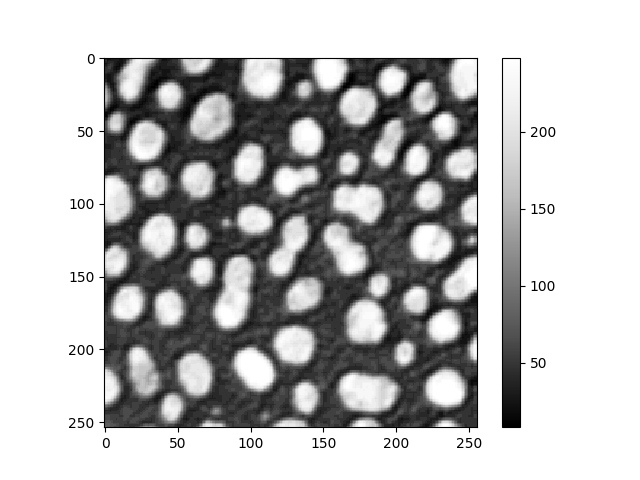
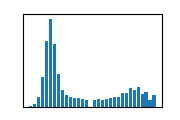

In [2]:
image = imread("blobs.tif")

stackview.insight(image)

In [8]:
annotation = np.zeros(image.shape, dtype=np.uint32)

stackview.annotate(image, annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
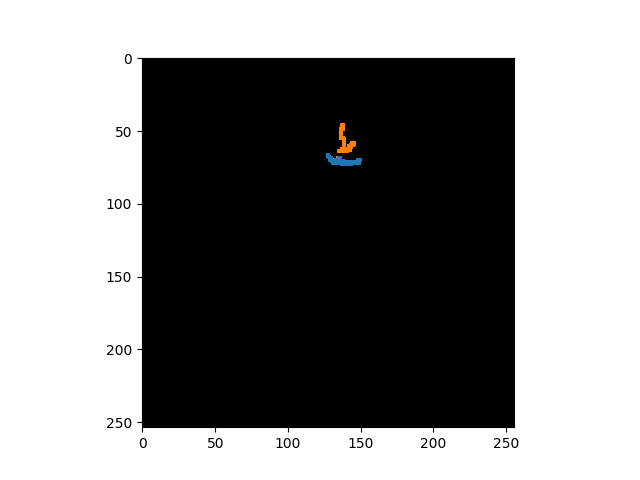

In [9]:
stackview.insight(annotation)

In [7]:
segmenter = apoc.ObjectSegmenter()

In [12]:
features = apoc.PredefinedFeatureSet.medium_quick.value

segmenter.train(features=features,
                image=image, 
                ground_truth=annotation
               )

segmenter

Classifier type: ObjectSegmenter
--- Random forest info ---
Used features for training: gaussian_blur=5 sobel_of_gaussian_blur=5
Ground truth dimensions: 2
Maximum depth: 2
Number of ensembles: 100
Number of classes: 2
Number of features: 2
Number of channels: 1Positive class identifier: 2

cl.OCLArray([[ 0,  0,  0, ..., 54, 54, 54],
       [ 0,  0,  0, ..., 54, 54, 54],
       [ 0,  0,  0, ..., 54, 54, 54],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
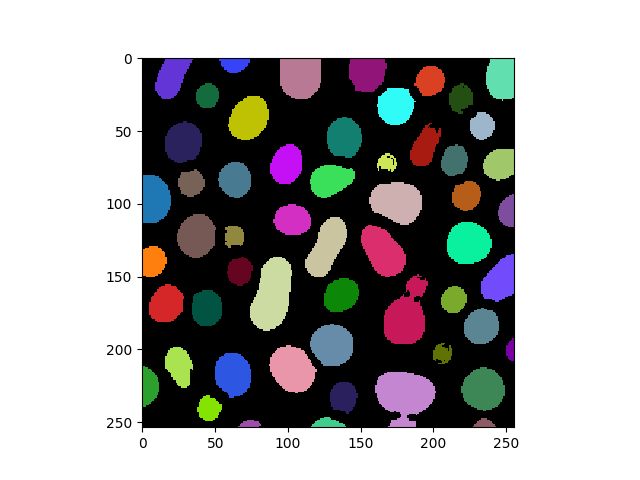

In [13]:
labels = segmenter.predict(image)

labels

In [14]:
stackview.curtain(image, labels)

In [16]:
stackview.switch([image, annotation, labels], toggleable=True)